# Train a simple linear model on features

In [39]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


`%matplotlib` prevents importing * from pylab and numpy


In [40]:
import pandas as pd
import datetime as dt
import re
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
filepath = '/media/sf_VBox_Shared/London/example_data'
toyset_train = pd.read_csv(filepath+'toydata_train.csv')
toyset_val = pd.read_csv(filepath+'toydata_val.csv')
toyset_test = pd.read_csv(filepath+'toydata_test.csv')
print(toyset_train.shape)
toyset_train.head()

(1079, 15)


,class,mean metric ENMO,sd metric ENMO,p5 metric ENMO,p25 metric ENMO,p50 metric ENMO,p75 metric ENMO,p95 metric ENMO,mean metric anglez,sd metric anglez,p5 metric anglez,p25 metric anglez,p50 metric anglez,p75 metric anglez,p95 metric anglez
0,0.0,0.015160,0.000522,0.014232,0.014874,0.015133,0.015534,0.015891,-39.349687,0.065171,-39.452094,-39.391423,-39.336663,-39.307390,-39.264456
1,0.0,0.015181,0.004180,0.010862,0.014729,0.015099,0.015506,0.016189,-37.359455,7.890470,-39.431267,-39.364191,-39.337401,-39.299842,-26.144194
2,0.0,0.015197,0.008969,0.011073,0.011628,0.012248,0.012886,0.025105,-36.171533,5.857137,-48.853285,-34.069524,-33.879162,-32.846824,-32.753698
3,0.0,0.015590,0.020108,0.000000,0.000000,0.000000,0.025809,0.040461,5.806129,54.439121,-59.597338,-46.786000,55.306174,55.474992,60.089516
4,0.0,0.015701,0.048134,0.000000,0.000000,0.000000,0.002085,0.126108,40.566915,41.533981,-48.059292,0.209581,63.169964,72.172328,72.429488


In [42]:
X_train = np.array(toyset_train)[:,1:]
y_train = np.array(toyset_train.loc[:,'class'], dtype='int')
X_val = np.array(toyset_val)[:,1:]
y_val = np.array(toyset_val.loc[:,'class'], dtype='int')
X_test = np.array(toyset_test)[:,1:]
y_test = np.array(toyset_test.loc[:,'class'], dtype='int')

In [55]:
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)
X_train_normalized = (X_train - mu ) / sig
X_val_normalized = (X_val - mu ) / sig
X_test_normalized = (X_test - mu ) / sig

In [56]:
mod = LogisticRegression()

In [57]:
fitted = mod.fit(X_train_normalized, y_train)

In [58]:
fitted.score(X_val_normalized, y_val)

0.85074626865671643

In [59]:
y_val_pred = fitted.predict(X_val_normalized)
metrics.confusion_matrix(y_val, y_val_pred)

array([[31,  1],
       [19, 83]])

In [60]:
fitted.score(X_test_normalized, y_test)

0.74264705882352944

## Analyses

Let's analyse what the model does

In [61]:
featurenames = toyset_train.columns[1:]
for i in range(len(featurenames)):
    print('{}: \t {:.3}'.format(featurenames[i], fitted.coef_[0, i]))

mean metric ENMO: 	 0.365
sd metric ENMO: 	 -0.368
p5 metric ENMO: 	 0.121
p25 metric ENMO: 	 -0.227
p50 metric ENMO: 	 -0.354
p75 metric ENMO: 	 0.415
p95 metric ENMO: 	 1.19
mean metric anglez: 	 0.316
sd metric anglez: 	 -2.02
p5 metric anglez: 	 -1.58
p25 metric anglez: 	 -0.427
p50 metric anglez: 	 -0.298
p75 metric anglez: 	 0.299
p95 metric anglez: 	 2.05


In [49]:
toyset_train.groupby("class").describe()

mean metric ENMO  mean metric anglez  p25 metric ENMO  \
class                                                                
0.0   count        650.000000          650.000000       650.000000   
      mean           0.013136          -13.239248         0.007623   
      std            0.016401           36.450058         0.010945   
      min            0.000000          -86.314260         0.000000   
      25%            0.001347          -40.980107         0.000000   
      50%            0.008138          -12.409748         0.002189   
      75%            0.018937            6.927268         0.011852   
      max            0.126575           85.079759         0.067838   
1.0   count        429.000000          429.000000       429.000000   
      mean           0.034546          -12.324983         0.014457   
      std            0.030380           24.947601         0.019492   
      min            0.000000          -74.966348         0.000000   
      25%            0.014999          -28.284529         0.003530   
      50%            0.025661          -11.737098         0.009677   
      75%            0.041257            4.025633         0.018748   
      max            0.182183           63.851449         0.165319   

             p25 metric anglez  p5 metric ENMO  p5 metric anglez  \
class                                                              
0.0   count         650.000000      650.000000        650.000000   
      mean          -22.724471        0.005326        -31.722698   
      std            39.405917        0.009059         37.303160   
      min           -87.080591        0.000000        -87.358414   
      25%           -54.448971        0.000000        -60.102291   
      50%           -31.036297        0.000277        -41.604560   
      75%             0.000000        0.007651          0.000000   
      max            85.037110        0.043929         85.018345   
1.0   count         429.000000      429.000000        429.000000   
      mean          -26.618613        0.006789        -42.702173   
      std            26.686453        0.012580         25.629493   
      min           -86.864686        0.000000        -88.037057   
      25%           -46.066430        0.000488        -62.292375   
      50%           -28.024208        0.002862        -45.803570   
      75%            -8.629752        0.007844        -27.083869   
      max            54.113960        0.116980         36.680605   

             p50 metric ENMO  p50 metric anglez  p75 metric ENMO  \
class                                                              
0.0   count       650.000000         650.000000       650.000000   
      mean          0.010417         -13.266917         0.014777   
      std           0.014209          40.554843         0.020259   
      min           0.000000         -86.545109         0.000000   
      25%           0.000033         -44.739263         0.000220   
      50%           0.004313         -13.076092         0.008966   
      75%           0.016938           9.816969         0.024017   
      max           0.112893          85.093709         0.170453   
1.0   count       429.000000         429.000000       429.000000   
      mean          0.024621         -13.076683         0.041983   
      std           0.027044          28.148290         0.038645   
      min           0.000000         -85.961988         0.000000   
      25%           0.007469         -28.987821         0.016882   
      50%           0.017868         -12.698694         0.030315   
      75%           0.031263           4.141770         0.051569   
      max           0.183245          84.119197         0.207870   

             p75 metric anglez  p95 metric ENMO  p95 metric anglez  \
class                                                                
0.0   count         650.000000       650.000000         650.000000   
      mean           -4.099095         0.027685           5.954629   
      std            4

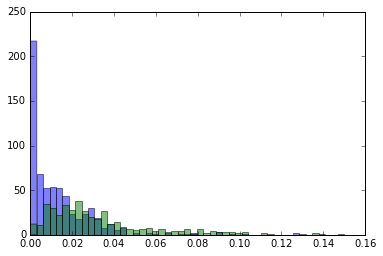

In [62]:
histogram = plt.figure()
bins = np.linspace(0, 0.15, 50)
plt.hist(toyset_train[toyset_train["class"]==0]['mean metric ENMO'], bins, alpha=0.5)
plt.hist(toyset_train[toyset_train["class"]==1]['mean metric ENMO'], bins, alpha=0.5)
plt.show()